In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
# importing the dataset
abalone_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone_df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


### EDA

In [6]:
# Checking Null Values
abalone_df.isnull().sum()
# There are no null values in this dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
# Checking duplicates
duplicates = abalone_df[abalone_df.duplicated()]

In [8]:
duplicates # No Duplicates

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [9]:
abalone_df.shape

(4177, 9)

In [10]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
abalone_df['Rings'].unique() # Target variables has rings data from 1 to 26

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [12]:
abalone_df['Sex'].unique() # there are three categories in the Sex feature, we have to label it using nonehot encoding or dummies

array(['M', 'F', 'I'], dtype=object)

In [13]:
# Summary of the data
abalone_df.describe(include='all').transpose()

# The data is skewed and ouliers might be present

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4177,3,M,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4177.0,NaN,NaN,NaN,0.523992,0.120093,0.075,0.45,0.545,0.615,0.815
Diameter,4177.0,NaN,NaN,NaN,0.407881,0.09924,0.055,0.35,0.425,0.48,0.65
Height,4177.0,NaN,NaN,NaN,0.139516,0.041827,0.0,0.115,0.14,0.165,1.13
Whole weight,4177.0,NaN,NaN,NaN,0.828742,0.490389,0.002,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,NaN,NaN,NaN,0.359367,0.221963,0.001,0.186,0.336,0.502,1.488
Viscera weight,4177.0,NaN,NaN,NaN,0.180594,0.109614,0.0005,0.0935,0.171,0.253,0.76
Shell weight,4177.0,NaN,NaN,NaN,0.238831,0.139203,0.0015,0.13,0.234,0.329,1.005
Rings,4177.0,NaN,NaN,NaN,9.933684,3.224169,1.0,8.0,9.0,11.0,29.0


In [14]:
abalone_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Text(0, 0.5, 'Rings')

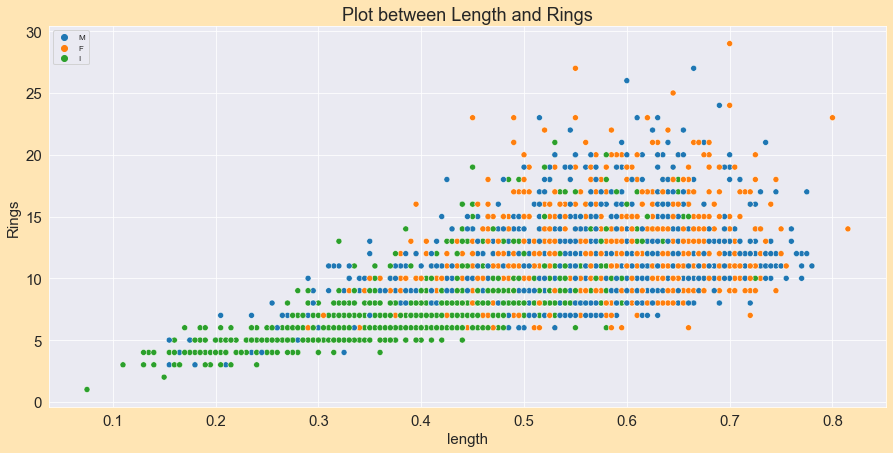

In [15]:
# Visualizing the DATA
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Length and Rings')
sns.scatterplot(x = abalone_df['Length'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('length')
plt.ylabel('Rings')

# We can see there is a positive correlation between length and rings
# We can observe that the highest length in the species is of a female one

<AxesSubplot:xlabel='Sex', ylabel='count'>

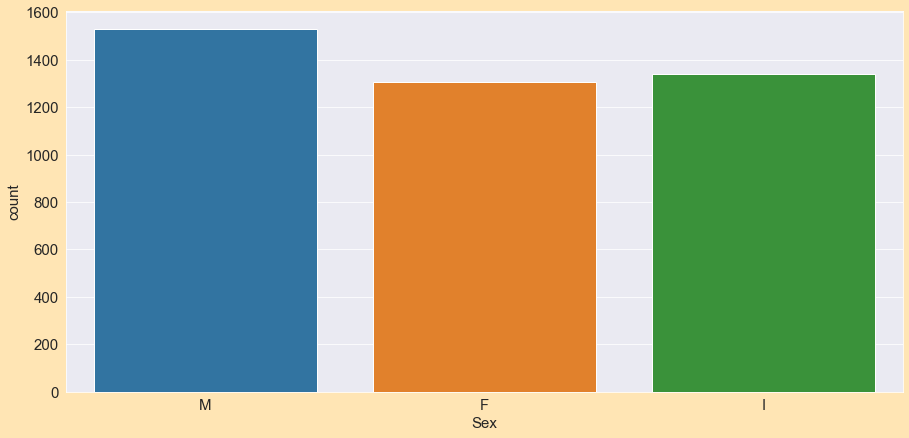

In [16]:
sns.countplot(abalone_df['Sex'])
# we can see the sex feature is balanced

Text(0, 0.5, 'Rings')

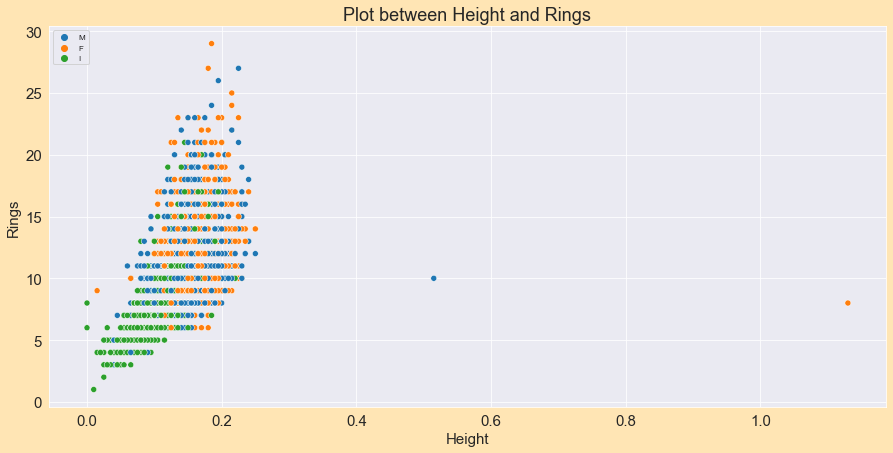

In [17]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Height and Rings')
sns.scatterplot(x = abalone_df['Height'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Height')
plt.ylabel('Rings')
# We can see there are two outilers present in the Height which are more than 0.4 cm

Text(0, 0.5, 'Rings')

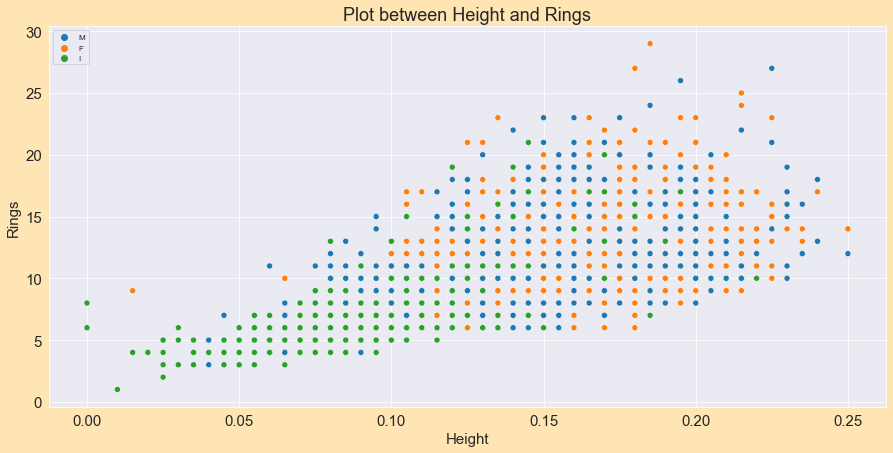

In [18]:
# removing those 2 points which are far away to find out if it affects the distribution and plotting the scatter plot again
abalone_df = abalone_df[abalone_df.Height < 0.4]
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Height and Rings')
sns.scatterplot(x = abalone_df['Height'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Height')
plt.ylabel('Rings')
# We can see the distribution is a  normalised

array([[<AxesSubplot:title={'center':'Height'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

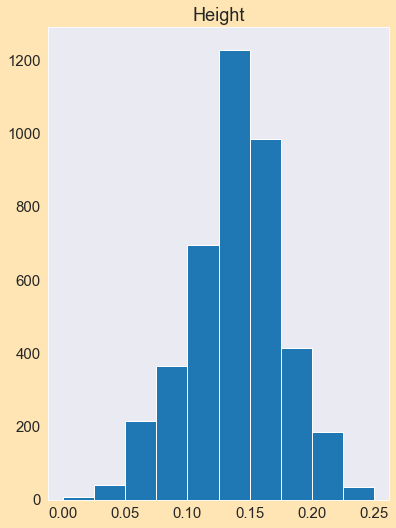

In [19]:
abalone_df.hist(column = 'Height', figsize=(30,20), grid=False, layout=(2,4))
# Now it has become close to normal distribution
# we can say because of those outliers, the distribution was highly skewed

Text(0, 0.5, 'Rings')

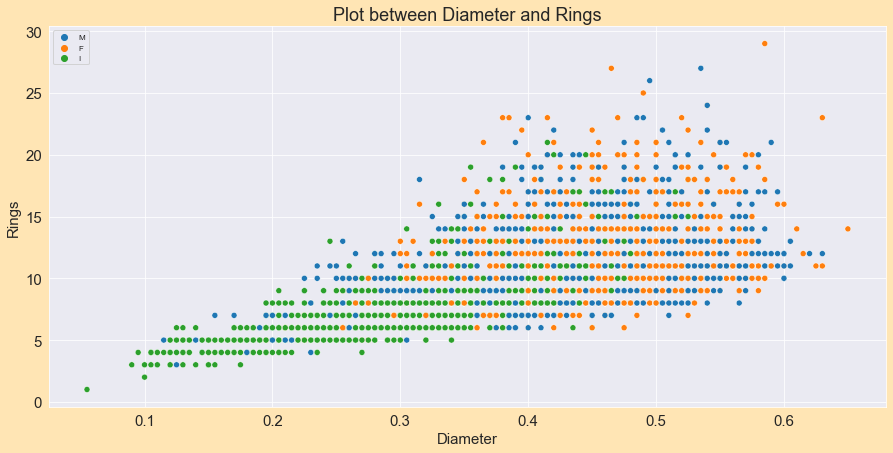

In [20]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Diameter and Rings')
sns.scatterplot(x = abalone_df['Diameter'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Diameter')
plt.ylabel('Rings')



Text(0, 0.5, 'Rings')

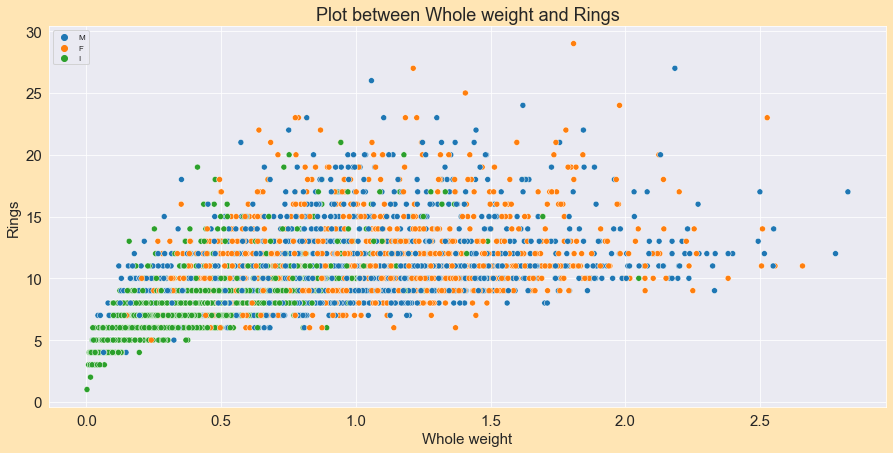

In [21]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Whole weight and Rings')
sns.scatterplot(x = abalone_df['Whole weight'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Whole weight')
plt.ylabel('Rings')


Text(0, 0.5, 'Rings')

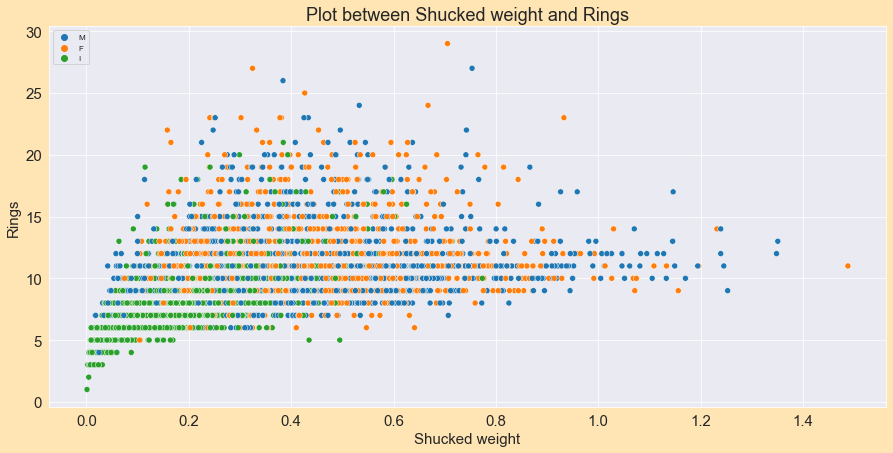

In [22]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Shucked weight and Rings')
sns.scatterplot(x = abalone_df['Shucked weight'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Shucked weight')
plt.ylabel('Rings')

Text(0, 0.5, 'Rings')

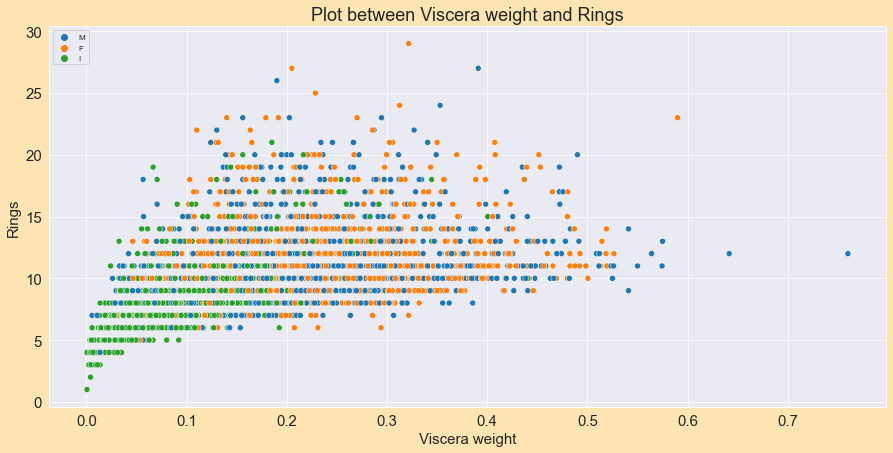

In [23]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Viscera weight and Rings')
sns.scatterplot(x = abalone_df['Viscera weight'],y = abalone_df['Rings'],hue = abalone_df['Sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Viscera weight')
plt.ylabel('Rings')
# Outliers are present in this
#

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

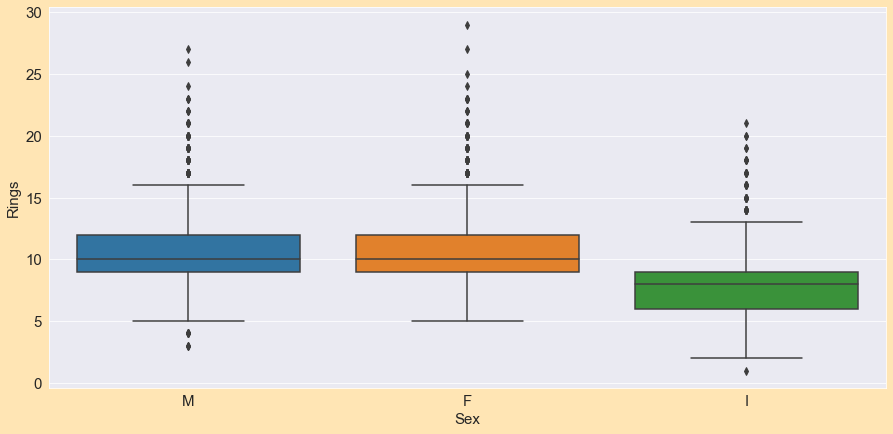

In [24]:
# relationship between sex and target Rings
sns.boxplot(x='Sex',y='Rings',data=abalone_df)

# Distribution between Male and Female is similar
# Most of the Rings both for Male and Female are between 8 and 19
# Infants have mostly from 5 to 10 Rings
# most of the rings are lying between 3 to 22

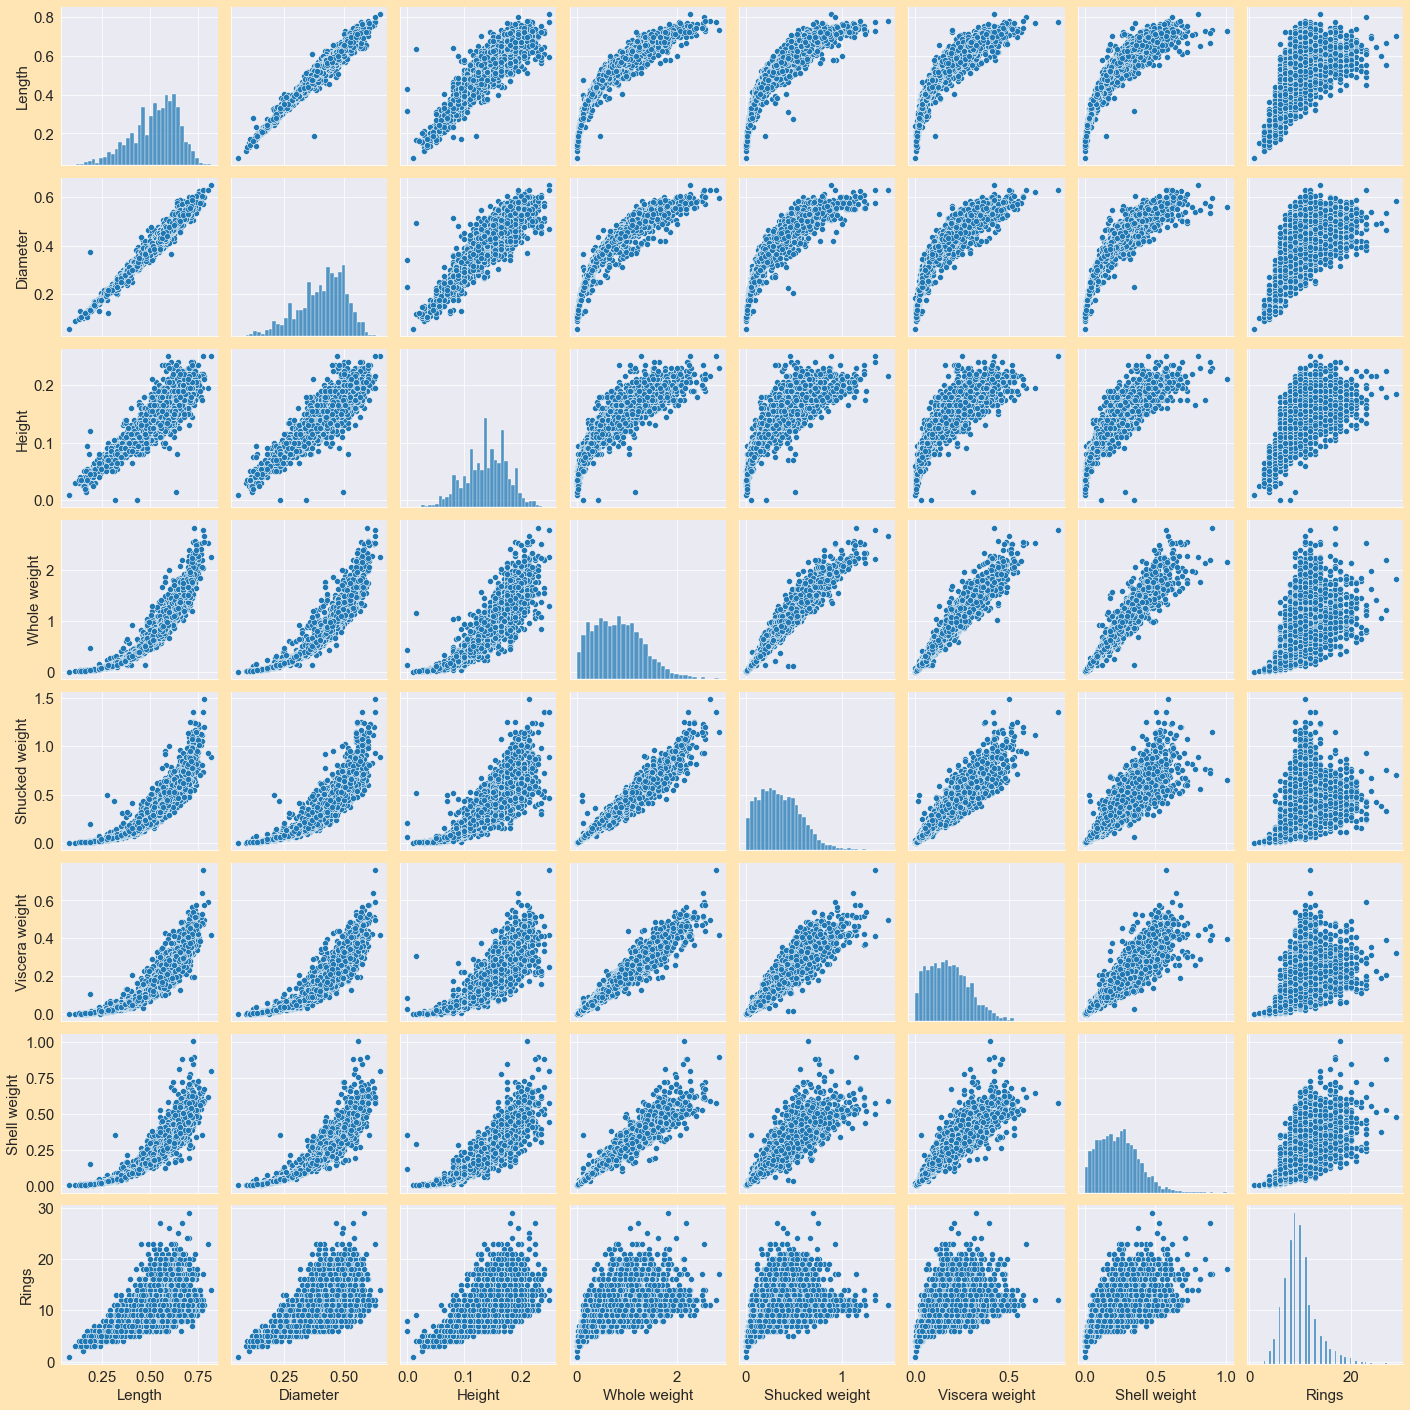

In [25]:
# pair plot
sns.pairplot(abalone_df)

# Many features are highly correlate
# length and diameter show linear correlation
# length and weight features are quadratic correlated
# whole weight is linearly correlated with other weight features
# Number of Rings is positively corelated with almost all quadratic features
# Possible outliers in Height features

In [26]:
# checking correlation
correlation = abalone_df.corr()
correlation

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986804,0.899834,0.925372,0.898184,0.903091,0.897648,0.556827
Diameter,0.986804,1.000000,0.906086,0.925537,0.893385,0.899768,0.905271,0.574792
Height,0.899834,0.906086,1.000000,0.887712,0.836400,0.865710,0.888980,0.609634
Whole weight,0.925372,0.925537,0.887712,1.000000,0.969386,0.966311,0.955385,0.540859
Shucked weight,0.898184,0.893385,0.836400,0.969386,1.000000,0.931868,0.882681,0.421442
Viscera weight,0.903091,0.899768,0.865710,0.966311,0.931868,1.000000,0.907603,0.504234
Shell weight,0.897648,0.905271,0.888980,0.955385,0.882681,0.907603,1.000000,0.627815
Rings,0.556827,0.574792,0.609634,0.540859,0.421442,0.504234,0.627815,1.000000


<AxesSubplot:>

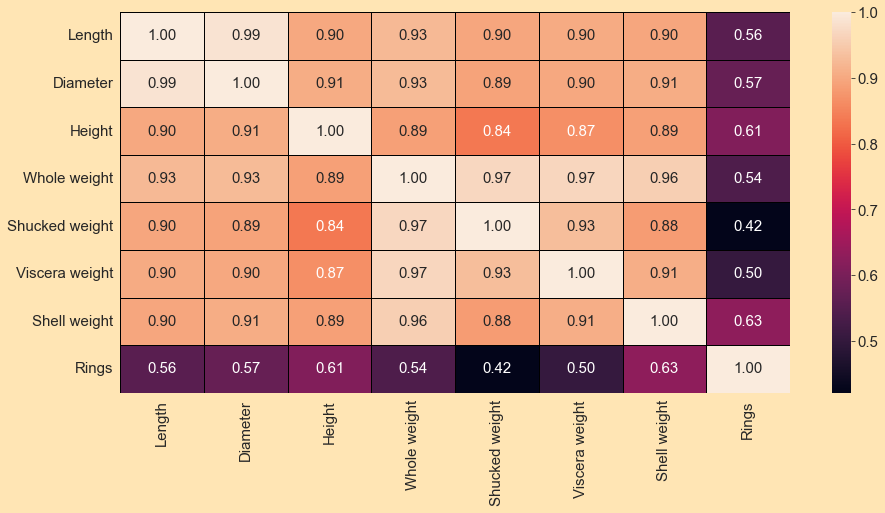

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True,linewidths = 0.5,linecolor='black',fmt='.2f')

In [28]:
# We can see the features are highly correlated and multicollinearity might be present
# Whole weight is almost linearly correlated with all the features except Rings
# Length is linearly correlated with Diameter
# From all the features excluding Rings, Height is least correlated with other features
# Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter

In [29]:
# Skewness
abalone_df.skew().sort_values()
# We can see that Height skewness is decreased as we removed the outlier previously 

Length           -0.640423
Diameter         -0.609823
Height           -0.264536
Whole weight      0.528732
Viscera weight    0.589856
Shell weight      0.620924
Shucked weight    0.715003
Rings             1.113615
dtype: float64

In [30]:
abalone_df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4093,M,0.63,0.485,0.18,1.2435,0.5175,0.308,0.37,11


In [31]:
abalone_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [32]:
# removing outliers
dfContCols = abalone_df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
from scipy.stats import zscore

z = np.abs(zscore(dfContCols))

print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  694,  696,  696,  719,  719,  720,  720,  891,
        891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199, 1202,
       1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417,
       1421, 1425, 1426, 1426, 1426, 1427, 1428, 1428, 1527, 1753, 1755,
       1756, 1758, 1760, 1761, 1761, 1761, 1762, 1762, 1762, 1820, 1981,
       1985, 1986, 1986, 2088, 2106, 2112, 2112, 2155, 2159, 2167, 2206,
       2272, 2332, 2332, 2366, 2379, 2542, 2621, 2622, 2622, 2622, 2623,
       2707, 2708, 2708, 2808, 2808, 2809, 2809, 2809, 2860, 2861, 2861,
       2861, 3005, 3006, 3146, 3147, 3149, 3186, 3425, 3425, 3425, 3597,
       3597, 3626, 3711, 3713, 3713, 3713, 3713, 3798, 3835, 3897, 3897,
       3900, 3900, 3959, 3960, 3994, 4143, 4146], dtype=int64), array([6, 6, 6, 6, 3, 4, 6, 6, 6, 5, 0, 1, 2, 0, 1, 0, 1, 0

In [33]:
abalone_new=abalone_df[(z<3).all(axis=1)]

In [34]:
print("shape before and after")
print("shape before".ljust(20),":", abalone_df.shape)
print("shape after".ljust(20),":", abalone_new.shape)
print("Percentage Loss".ljust(20),":", (abalone_df.shape[0]-abalone_new.shape[0])/abalone_df.shape[0])

shape before and after
shape before         : (4175, 9)
shape after          : (4082, 9)
Percentage Loss      : 0.022275449101796407


Length                AxesSubplot(0.125,0.71587;0.227941x0.16413)
Diameter           AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Height             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Whole weight         AxesSubplot(0.125,0.518913;0.227941x0.16413)
Shucked weight    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Viscera weight    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Shell weight         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Rings             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
dtype: object

<Figure size 1800x720 with 0 Axes>

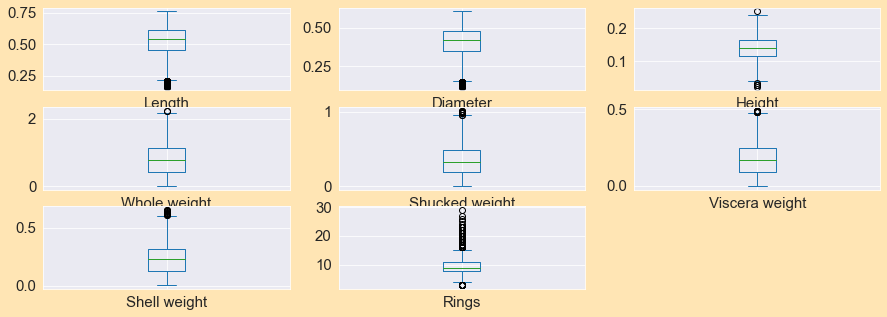

In [35]:
# Checking the outliers again
plt.figure(figsize=(25,10))
abalone_new.plot(kind ='box',subplots = True, layout =(4,3),sharex = False)
# we can see the farmost outliers are removed
# And we have no problem with continuous outliers

In [36]:
# checking skewness
abalone_new.skew().sort_values()

Length           -0.630631
Diameter         -0.602401
Height           -0.235710
Whole weight      0.324693
Shell weight      0.359198
Viscera weight    0.430887
Shucked weight    0.450407
Rings             1.137592
dtype: float64

<AxesSubplot:>

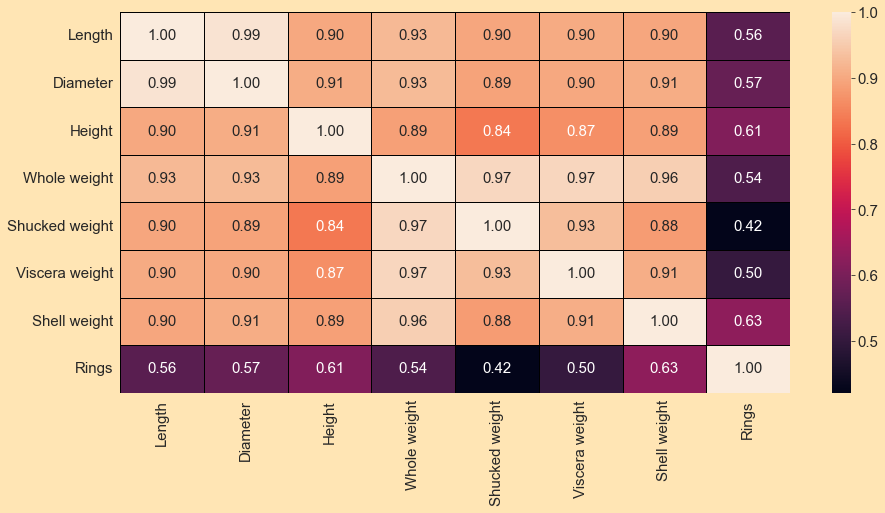

In [37]:
# Checking the correlation again
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True,linewidths = 0.5,linecolor='black',fmt='.2f')
# we have to perform multicollineariy test using vif

In [38]:
# labelling the categorical feature using onehot encoding and dropping the first column to avoid more multicollinearity
abalone_new = pd.get_dummies(abalone_new,drop_first=True)
abalone_new.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


In [39]:
# MULTICOLLINEARITY CHECKING

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# splitting the data into features(x) and target(y)
x = abalone_new.drop(['Rings'], axis = 1)
y = abalone_new['Rings']

In [41]:
def vif_calc():
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [42]:
vif_calc()
# We can see length, Diameter and whole weight is having huge vif 
# checking the heatmap to see which highly correlated feature is contributing more
# we should drop length because out of length and diameter, diameter is contributing more
# same with the whole weight and shucked weight, we should drop shucked weight as it is less contributing to target
# But given that we have less features, We will try to reduce the multicollinearity by performing pca

         Features  VIF Factor
0          Length  739.320650
1        Diameter  768.545180
2          Height   94.311180
3    Whole weight  432.532951
4  Shucked weight  104.900351
5  Viscera weight   65.218714
6    Shell weight   93.139960
7           Sex_I    2.563941
8           Sex_M    2.105589


In [43]:
# Model testinf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
##feature Scaling
from sklearn.preprocessing import StandardScaler # removing skewness
from sklearn.linear_model import LinearRegression


In [44]:
def reg(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size=0.25, random_state=80)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [45]:
steps=[("standard_scaler",StandardScaler()),('pca',PCA(n_components=2)),("regresssor",LinearRegression())]
      
steps

[('standard_scaler', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('regresssor', LinearRegression())]

In [46]:
pipe=Pipeline(steps)

In [47]:
pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('regresssor', LinearRegression())])

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=0)

In [49]:
# Hyperparameter tuning for regression model selecting the best parameters

paramLin = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LinearReg = GridSearchCV(LinearRegression(),paramLin, cv = 10)
LinearReg.fit(X = x_train,y= y_train)
LinearRegmodel = LinearReg.best_estimator_
print(LinearReg.best_score_, LinearReg.best_params_)

0.5373500577727459 {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [50]:
LinearReg.score(x_train,y_train)

0.545098658908652

In [51]:
LinearReg.score(x_test,y_test)

0.5114719719606042

Text(0, 0.5, 'Predictions')

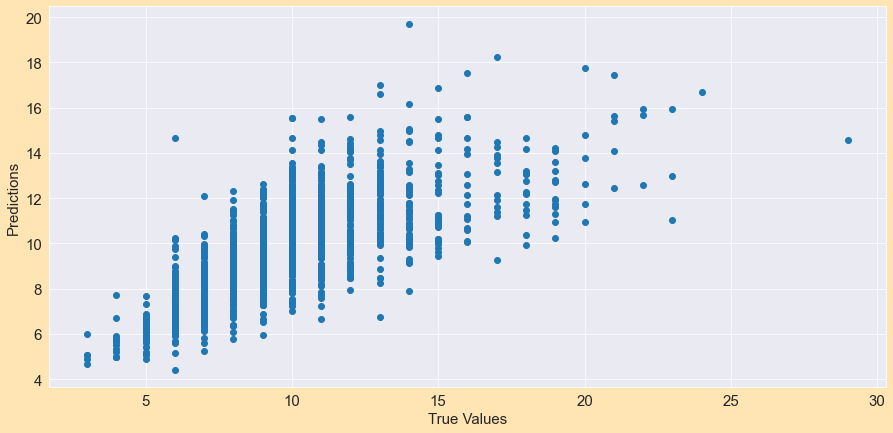

In [52]:
predictions = LinearReg.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [53]:
# Using ridge regression to tackle with the multicollinearity
from sklearn.linear_model import Ridge
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg.fit(X = x_train,y= y_train)
Rmodel = ridgeReg.best_estimator_
print(ridgeReg.best_score_, ridgeReg.best_params_)

0.5378182534268771 {'alpha': 0.01, 'solver': 'sparse_cg'}


In [54]:
ridgeReg.score(x_train,y_train)

0.5450947145000227

In [55]:
ridgeReg.score(x_test,y_test)

0.5114306158498978

Text(0, 0.5, 'Predictions')

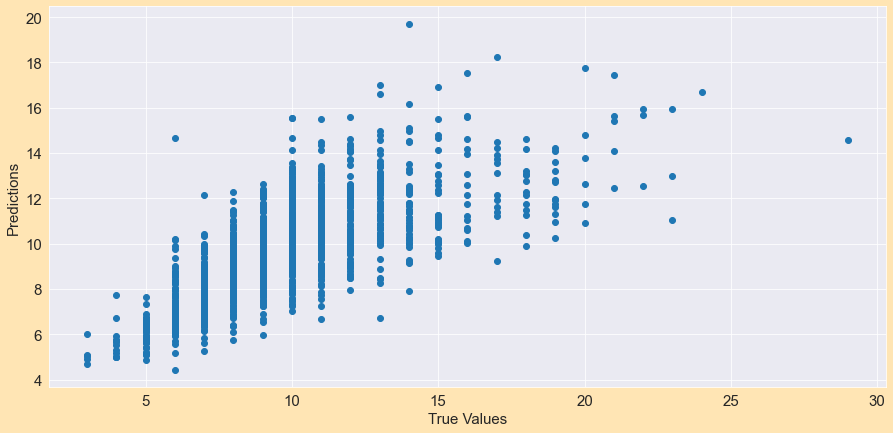

In [56]:
predictions = ridgeReg.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# we can see that the predictions are accurate 

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_std)
y_kmeans = kmeans.predict(x_std)

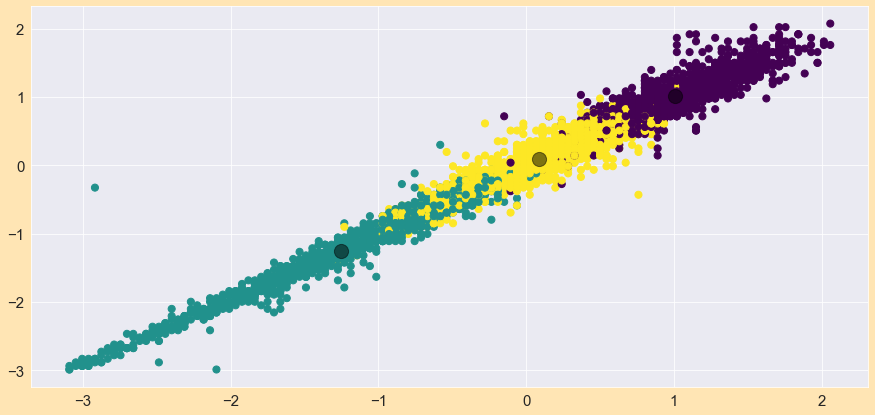

In [59]:
plt.scatter(x_std[:, 0], x_std[:, 1], c=y_kmeans, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
pred = lr.predict(x_test)

In [64]:
r2_score(y_test,pred)

0.5114719719606042

In [65]:
mean_squared_error(y_test,pred)

4.878133177587844

In [66]:
# cv
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [68]:
for i in range(4,15):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.47932463 0.16916125 0.54695524 0.51683571]
At cv:-  4
Cross validation score is:-  42.806920574152215
r2_score is:-  51.147197196060425


[0.4163418  0.15802812 0.52090916 0.50471236 0.46056508]
At cv:-  5
Cross validation score is:-  41.211130270495076
r2_score is:-  51.147197196060425


[0.42319931 0.5048747  0.10021072 0.57153543 0.5054814  0.43184156]
At cv:-  6
Cross validation score is:-  42.28571861828104
r2_score is:-  51.147197196060425


[0.48717192 0.50306732 0.12034319 0.5656125  0.47818105 0.52399968
 0.4397731 ]
At cv:-  7
Cross validation score is:-  44.54498223742086
r2_score is:-  51.147197196060425


[0.54050215 0.42705634 0.31472614 0.03613197 0.54702467 0.21045056
 0.54882647 0.43496345]
At cv:-  8
Cross validation score is:-  38.24602160474887
r2_score is:-  51.147197196060425


[0.5509086  0.44733712 0.14753094 0.08041843 0.5647471  0.5491962
 0.47718345 0.49191743 0.47440599]
At cv:-  9
Cross validation score is:-  42.040503044392274
r2_score is:-  51.14719719

In [70]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


In [71]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print('dtr score:',dtr.score(x_train,y_train))

dtrpred = dtr.predict(x_test)
print('dtr r2_score:',r2_score(y_test,dtrpred))

print('Mean Absolute Error of dtr:',mean_absolute_error(y_test,dtrpred))
print('Mean Squared Error: of dtr',mean_squared_error(y_test,dtrpred))
print('Root Mean Squared Error of dtr:',np.sqrt(mean_squared_error(y_test,dtrpred)))

dtr score: 1.0
dtr r2_score: 0.10663069755301557
Mean Absolute Error of dtr: 2.0526706231454006
Mean Squared Error: of dtr 8.920623145400594
Root Mean Squared Error of dtr: 2.986741225047894


In [76]:
pred_dtr = dtr.predict(x_test)
from sklearn.model_selection import cross_val_score
dts = r2_score(y_test,pred_dtr)

In [73]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
print('knr score:',knr.score(x_train,y_train))

knrpred = knr.predict(x_test)
print('knr r2_score:',r2_score(y_test,knrpred))

print('Mean Absolute Error of knr:',mean_absolute_error(y_test,knrpred))
print('Mean Squared Error of knr:',mean_squared_error(y_test,knrpred))
print('Root Mean Squared Error of knr:',np.sqrt(mean_squared_error(y_test,knrpred)))

knr score: 0.6692879280751101
knr r2_score: 0.4754521777891825
Mean Absolute Error of knr: 1.5664688427299702
Mean Squared Error of knr: 5.237804154302671
Root Mean Squared Error of knr: 2.288624948370237


In [74]:
kernellist = ['linear','poly','rbf']
for i in kernellist:
    sv = SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))
    

0.47894286596847824
0.5053728618673827
0.5030165565271947


In [75]:
sv = SVR(kernel ='linear')
sv.fit(x_train,y_train)
pred_sv = sv.predict(x_test)

print('r2_score of svr is',r2_score(y_test,pred_sv))
print('Mean Absolute Error of svr:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error of svr:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error of svr:',np.sqrt(mean_squared_error(y_test,pred_sv)))     

r2_score of svr is 0.43965005842008087
Mean Absolute Error of svr: 1.577601694226452
Mean Squared Error of svr: 5.59530156754892
Root Mean Squared Error of svr: 2.365438979882787


In [80]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(x_train,y_train)
print('sgd score:',sgd.score(x_train,y_train))

sgdpred = sgd.predict(x_test)
print('sgd r2_score:',r2_score(y_test,sgdpred))

print('Mean Absolute Error of sgd:',mean_absolute_error(y_test,sgdpred))
print('Mean Squared Error of sgd:',mean_squared_error(y_test,sgdpred))
print('Root Mean Squared Error of sgd:',np.sqrt(mean_squared_error(y_test,sgdpred)))

sgd score: 0.5073436049157198
sgd r2_score: 0.46976026233565826
Mean Absolute Error of sgd: 1.6212738959483481
Mean Squared Error of sgd: 5.294640036840044
Root Mean Squared Error of sgd: 2.3010084825658605


In [81]:
# SAVING THE BEST MODEL
import pickle
filename = 'world_happiness.pkl'
pickle.dump(lr,open(filename, 'wb'))